In [2]:
# This code simulates the tossing of a coin using Pytorch.

# We toss a coin 100 times, 200 times and 5000 times to see the outcome.
# There are two equally likely outcomes - Heads and Tails.

import torch
%matplotlib inline
import random
from torch.distributions.multinomial import Multinomial
from d2l import torch as d2l

In [4]:
# Without Pytorch:

number_of_tosses = 100
heads = sum([random.random() > 0.5 for each_toss in range(number_of_tosses)])
tails = number_of_tosses - heads
print(" HEADS, TAILS : ", [heads, tails])

 HEADS, TAILS :  [55, 45]


# With Pytorch

In [5]:
# Multinomial is a function to simulate multiple draws with a finite number of outcomes.
# It returns a tensor vector.

fair_probability = torch.tensor([0.5, 0.5])

number_of_tosses = [100, 200, 5000]


In [7]:
for toss_iteration in number_of_tosses:
    count = Multinomial(toss_iteration, fair_probability).sample()
    print(" Total Tosses : ", toss_iteration, " Tensor [HEADS, TAILS] : ", count, "Probability Observed = ", count/toss_iteration)
    

 Total Tosses :  100  Tensor [HEADS, TAILS] :  tensor([43., 57.]) Probability Observed =  tensor([0.4300, 0.5700])
 Total Tosses :  200  Tensor [HEADS, TAILS] :  tensor([101.,  99.]) Probability Observed =  tensor([0.5050, 0.4950])
 Total Tosses :  5000  Tensor [HEADS, TAILS] :  tensor([2458., 2542.]) Probability Observed =  tensor([0.4916, 0.5084])


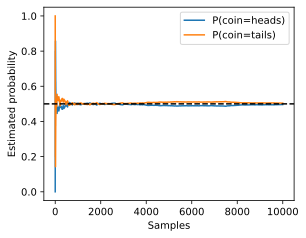

In [8]:
#PLotting

counts = Multinomial(1, fair_probability).sample((10000,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)
estimates = estimates.numpy()

d2l.set_figsize((4.5, 3.5))
d2l.plt.plot(estimates[:, 0], label=("P(coin=heads)"))
d2l.plt.plot(estimates[:, 1], label=("P(coin=tails)"))
d2l.plt.axhline(y=0.5, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Samples')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend();